In [ ]:
!pip install opencv-python-headless scikit-image matplotlib sewar brisque agh_vqis

Analyzing video: firework_desert.mp4
7
PSNR Average: 10.50
PSNR Variance: 0.17
7
SSIM Average: 0.34
SSIM Variance: 0.00
Analyzing video: horse_run_universe.mp4
7
PSNR Average: 12.13
PSNR Variance: 0.20
7
SSIM Average: 0.19
SSIM Variance: 0.00
Analyzing video: sample.mp4
30
PSNR Average: 30.47
PSNR Variance: 1.08
30
SSIM Average: 0.97
SSIM Variance: 0.00
Analyzing video: horse_run_road.mp4
7
PSNR Average: 13.21
PSNR Variance: 0.61
7
SSIM Average: 0.26
SSIM Variance: 0.00
Analyzing video: a_horse_runs_on_the_Mars(LAMP).mp4
15
PSNR Average: 22.00
PSNR Variance: 0.96
15
SSIM Average: 0.80
SSIM Variance: 0.00
Analyzing video: many_birds_fly_over_a_plaza(LAMP).mp4
15
PSNR Average: 21.53
PSNR Variance: 3.90
15
SSIM Average: 0.77
SSIM Variance: 0.00
Analyzing video: a_horse_runs_on_the_road(LAMP).mp4
15
PSNR Average: 28.84
PSNR Variance: 4.81
15
SSIM Average: 0.91
SSIM Variance: 0.00


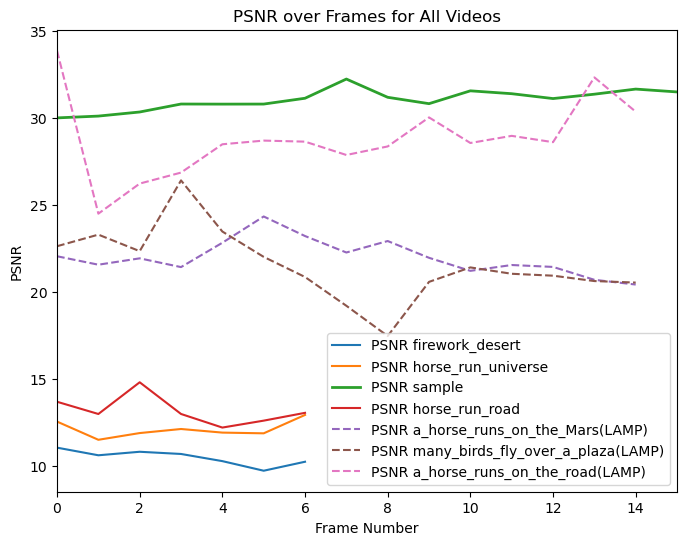

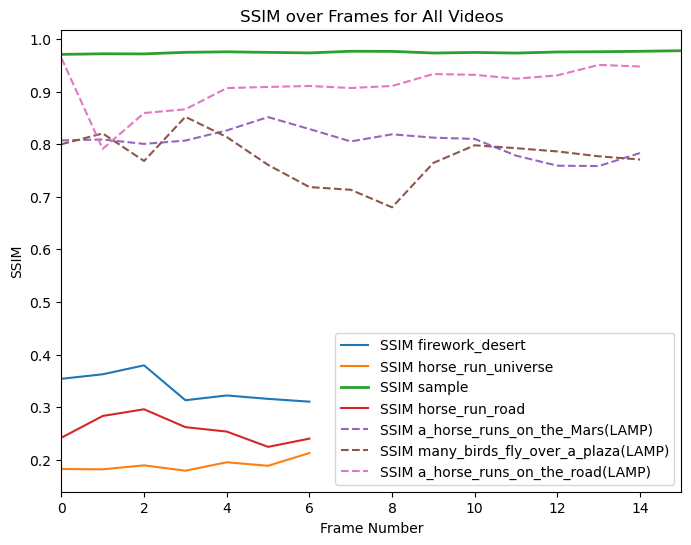

In [10]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim
from matplotlib import pyplot as plt
from pathlib import Path

def video_quality_analysis(video_path):
    if not video_path.is_file():
        print("Video file does not exist:", video_path)
        return None

    cap = cv2.VideoCapture(str(video_path))
    
    if not cap.isOpened():
        print("Error opening video file:", video_path)
        return None

    ret, prev_frame = cap.read()
    if not ret:
        print("Error reading the first frame of the video.")
        cap.release()
        return None

    prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    psnr_values = []
    ssim_values = []
    frame_numbers = []
    frame_count = 1
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        psnr = compare_psnr(prev_frame, frame)
        ssim = compare_ssim(prev_frame, frame)

        psnr_values.append(psnr)
        ssim_values.append(ssim)
        frame_numbers.append(frame_count)

        prev_frame = frame
        frame_count += 1

    cap.release()
    return psnr_values, ssim_values, frame_numbers

def print_stats(values, name):
    if values:
        print(len(values))
        mean_value = np.mean(values)
        var_value = np.var(values)
        print(f"{name} Average: {mean_value:.2f}")
        print(f"{name} Variance: {var_value:.2f}")
    else:
        print(f"No data to calculate {name} statistics.")

def plot_combined_quality_metrics(all_psnr_values, all_ssim_values, video_titles):
    # plot all PSNR metrics
    plt.figure(figsize=(8, 6))
    for video_title, psnr_values in all_psnr_values.items():
        if "LAMP" in video_title:
            plt.plot(psnr_values, label=f"PSNR {video_title}", linestyle='--') 
        elif "sample" in video_title:
            plt.plot(psnr_values, label=f"PSNR {video_title}", linewidth=2.0)  
        else:
            plt.plot(psnr_values, label=f"PSNR {video_title}")  
    plt.xlabel('Frame Number')
    plt.ylabel('PSNR')
    plt.title('PSNR over Frames for All Videos')
    plt.xlim(0, 15)
    plt.legend()
    plt.show()

    # plot all SSIM metrics
    plt.figure(figsize=(8, 6))
    for video_title, ssim_values in all_ssim_values.items():
        if "LAMP" in video_title:
            plt.plot(ssim_values, label=f"SSIM {video_title}", linestyle='--') 
        elif "sample" in video_title:
            plt.plot(ssim_values, label=f"SSIM {video_title}", linewidth=2.0)  
        else:
            plt.plot(ssim_values, label=f"SSIM {video_title}")  
    plt.xlabel('Frame Number')
    plt.ylabel('SSIM')
    plt.title('SSIM over Frames for All Videos')
    plt.xlim(0, 15)
    plt.legend()
    plt.show()

# initial dictionary to store
all_psnr_values = {}
all_ssim_values = {}

# iterate all videos from test
video_folder = Path('test')
video_files = video_folder.glob('*.mp4')

for video_path in video_files:
    print(f"Analyzing video: {video_path.name}")
    result = video_quality_analysis(video_path)

    if result:
        psnr_values, ssim_values, _ = result
        all_psnr_values[video_path.stem] = psnr_values
        all_ssim_values[video_path.stem] = ssim_values
        print_stats(psnr_values, "PSNR")
        print_stats(ssim_values, "SSIM")
    else:
        print("Failed to analyze video quality.")

# plot all 
plot_combined_quality_metrics(all_psnr_values, all_ssim_values, all_psnr_values.keys())

Analyzing video: firework_desert.mp4
VIF Average: 0.80
VIF Variance: 0.00
Analyzing video: horse_run_universe.mp4
VIF Average: 0.84
VIF Variance: 0.00
Analyzing video: sample.mp4
VIF Average: 0.94
VIF Variance: 0.00
Analyzing video: horse_run_road.mp4
VIF Average: 0.83
VIF Variance: 0.00
Analyzing video: a_horse_runs_on_the_Mars(LAMP).mp4
VIF Average: 0.88
VIF Variance: 0.00
Analyzing video: many_birds_fly_over_a_plaza(LAMP).mp4
VIF Average: 0.86
VIF Variance: 0.00
Analyzing video: a_horse_runs_on_the_road(LAMP).mp4
VIF Average: 0.97
VIF Variance: 0.00


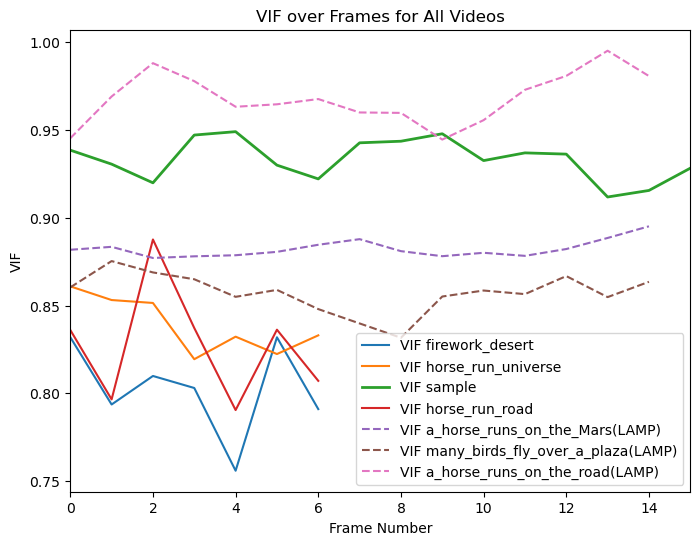

In [6]:
import cv2
import numpy as np
from pathlib import Path
import scipy.ndimage
from matplotlib import pyplot as plt

import numpy
import scipy.signal
import scipy.ndimage



def vifp_mscale(ref, dist):
    sigma_nsq=2
    eps = 1e-10

    num = 0.0
    den = 0.0
    for scale in range(1, 5):
       
        N = 2**(4-scale+1) + 1
        sd = N/5.0

        if (scale > 1):
            ref = scipy.ndimage.gaussian_filter(ref, sd)
            dist = scipy.ndimage.gaussian_filter(dist, sd)
            ref = ref[::2, ::2]
            dist = dist[::2, ::2]
                
        mu1 = scipy.ndimage.gaussian_filter(ref, sd)
        mu2 = scipy.ndimage.gaussian_filter(dist, sd)
        mu1_sq = mu1 * mu1
        mu2_sq = mu2 * mu2
        mu1_mu2 = mu1 * mu2
        sigma1_sq = scipy.ndimage.gaussian_filter(ref * ref, sd) - mu1_sq
        sigma2_sq = scipy.ndimage.gaussian_filter(dist * dist, sd) - mu2_sq
        sigma12 = scipy.ndimage.gaussian_filter(ref * dist, sd) - mu1_mu2
        
        sigma1_sq[sigma1_sq<0] = 0
        sigma2_sq[sigma2_sq<0] = 0
        
        g = sigma12 / (sigma1_sq + eps)
        sv_sq = sigma2_sq - g * sigma12
        
        g[sigma1_sq<eps] = 0
        sv_sq[sigma1_sq<eps] = sigma2_sq[sigma1_sq<eps]
        sigma1_sq[sigma1_sq<eps] = 0
        
        g[sigma2_sq<eps] = 0
        sv_sq[sigma2_sq<eps] = 0
        
        sv_sq[g<0] = sigma2_sq[g<0]
        g[g<0] = 0
        sv_sq[sv_sq<=eps] = eps
        
        num += numpy.sum(numpy.log10(1 + g * g * sigma1_sq / (sv_sq + sigma_nsq)))
        den += numpy.sum(numpy.log10(1 + sigma1_sq / sigma_nsq))
        
    vifp = num/den

    if numpy.isnan(vifp):
        return 1.0
    else:
        return vifp

def video_vif_analysis(video_path):
    cap = cv2.VideoCapture(str(video_path))
    
    if not cap.isOpened():
        print("Error opening video file")
        return

    ret, prev_frame = cap.read()
    if not ret:
        print("Error reading the first frame")
        return

    prev_frame = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    vif_values = []
    frame_numbers = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        vif = vifp_mscale(prev_frame, frame)
        vif_values.append(vif)
        frame_numbers.append(frame_count)

        prev_frame = frame
        frame_count += 1

    cap.release()
    return vif_values, frame_numbers

def plot_combined_vif(all_vif_values, video_titles):
    plt.figure(figsize=(8, 6))
    for video_title, (vif_values, frame_numbers) in all_vif_values.items():
        if "LAMP" in video_title:
            plt.plot(frame_numbers, vif_values, label=f"VIF {video_title}", linestyle='--')  # 虚线
        elif "sample" in video_title:
            plt.plot(frame_numbers, vif_values, label=f"VIF {video_title}", linewidth=2.0)  # 粗线
        else:
            plt.plot(frame_numbers, vif_values, label=f"VIF {video_title}")  # 默认样式
    plt.xlabel('Frame Number')
    plt.ylabel('VIF')
    plt.title('VIF over Frames for All Videos')
    plt.xlim(0, 15)
    plt.legend()
    plt.show()

# intial 
all_vif_values = {}

# iterate all in test 
video_folder = Path('test')
video_files = video_folder.glob('*.mp4')

for video_path in video_files:
    print(f"Analyzing video: {video_path.name}")
    vif_values, frame_numbers = video_vif_analysis(video_path)

    if vif_values:
        all_vif_values[video_path.stem] = (vif_values, frame_numbers)
        print_stats(vif_values, "VIF")
    else:
        print("Failed to analyze video VIF.")

# plot all 
plot_combined_vif(all_vif_values, all_vif_values.keys())

8
Video: firework_desert
Average BRISQUE Score: 22.46
Standard Deviation of BRISQUE Score: 2.85
8
Video: horse_run_universe
Average BRISQUE Score: 25.88
Standard Deviation of BRISQUE Score: 3.96
31
Video: sample
Average BRISQUE Score: 43.58
Standard Deviation of BRISQUE Score: 0.99
8
Video: horse_run_road
Average BRISQUE Score: 22.18
Standard Deviation of BRISQUE Score: 7.78
16
Video: a_horse_runs_on_the_Mars(LAMP)
Average BRISQUE Score: 40.40
Standard Deviation of BRISQUE Score: 1.31
16
Video: many_birds_fly_over_a_plaza(LAMP)
Average BRISQUE Score: 33.17
Standard Deviation of BRISQUE Score: 10.86
16
Video: a_horse_runs_on_the_road(LAMP)
Average BRISQUE Score: 48.53
Standard Deviation of BRISQUE Score: 1.89


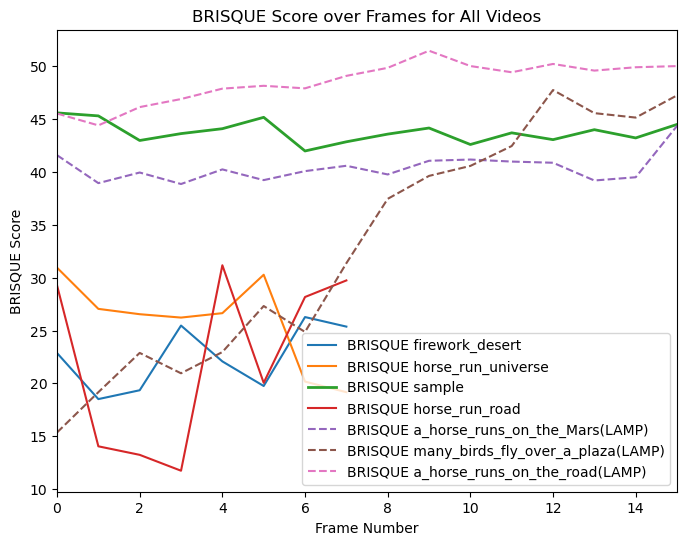

In [12]:
import cv2
from brisque import BRISQUE
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


def plot_combined_brisque(all_brisque_scores, video_titles):
    plt.figure(figsize=(8, 6))
    for video_title, scores in all_brisque_scores.items():
        # if title contains LAMP or sample
        if "LAMP" in video_title:
            plt.plot(scores, label=f"BRISQUE {video_title}", linestyle='--')
        elif "sample" in video_title:
            plt.plot(scores, label=f"BRISQUE {video_title}", linewidth=2.0)
        else:
            # default
            plt.plot(scores, label=f"BRISQUE {video_title}")
    plt.xlabel('Frame Number')
    plt.ylabel('BRISQUE Score')
    plt.title('BRISQUE Score over Frames for All Videos')
    plt.xlim(0, 15)
    plt.legend()
    plt.show()

all_brisque_scores = {}

# iterate all 
video_folder = Path('test')
video_files = video_folder.glob('*.mp4')
brisque_evaluator = BRISQUE()

for video_path in video_files:
    cap = cv2.VideoCapture(str(video_path))
    brisque_scores = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # compute score 
        score = brisque_evaluator.score(frame)
        brisque_scores.append(score)

    cap.release()

    # average and sd 
    print(len(brisque_scores))
    average_score = np.mean(brisque_scores)
    std_score = np.std(brisque_scores)
    print(f"Video: {video_path.stem}")
    print(f"Average BRISQUE Score: {average_score:.2f}")
    print(f"Standard Deviation of BRISQUE Score: {std_score:.2f}")

    # add to dictionary 
    all_brisque_scores[video_path.stem] = brisque_scores

# plot all 
plot_combined_brisque(all_brisque_scores, all_brisque_scores.keys())


In [ ]:
!python VQI.py # %run VQI.py

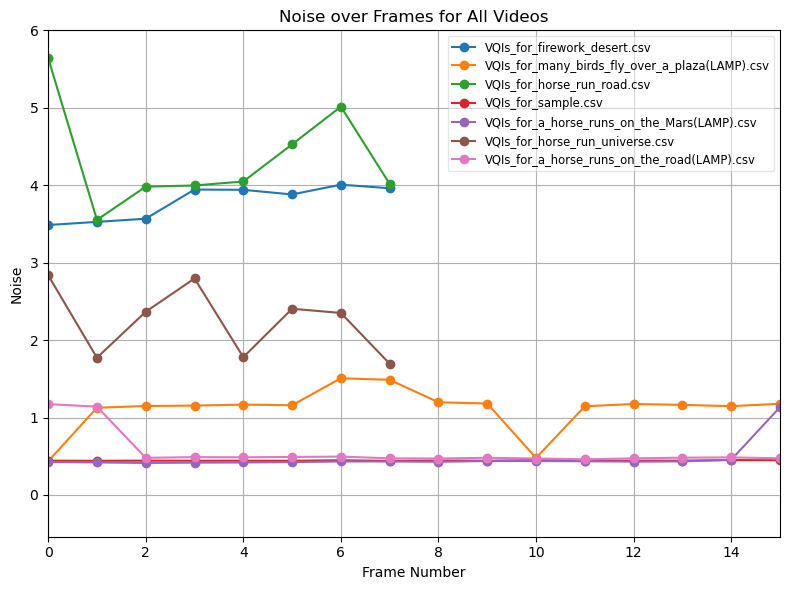

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory_path = 'test/'

# find all csv
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# store noise 
all_noise_data = {}

# read all 
for file in csv_files:
    try:
        data = pd.read_csv(directory_path + file)

        # take noise 
        if 'Noise' in data.columns:
            all_noise_data[file] = data['Noise']
    except pd.errors.EmptyDataError:
        print(f"The file {file} is empty.")
    except KeyError:
        print(f"The file {file} does not contain a 'Noise' column.")
    except Exception as e:
        print(f"An error occurred while reading {file}: {e}")


plt.figure(figsize=(8, 6))
for file, noise_data in all_noise_data.items():
    plt.plot(noise_data, marker='o', linestyle='-', label=file)

plt.title('Noise over Frames for All Videos')
plt.xlabel('Frame Number')
plt.ylabel('Noise')
plt.xlim(0, 15)  # x achse to 15
plt.ylim(noise_data.min() - 1, 5 + 1)  # wider y achse 
plt.legend(fontsize='small', framealpha=0.5, loc='upper right')  # move to upper right 
plt.grid(True)  #grid
plt.tight_layout()  
plt.show()


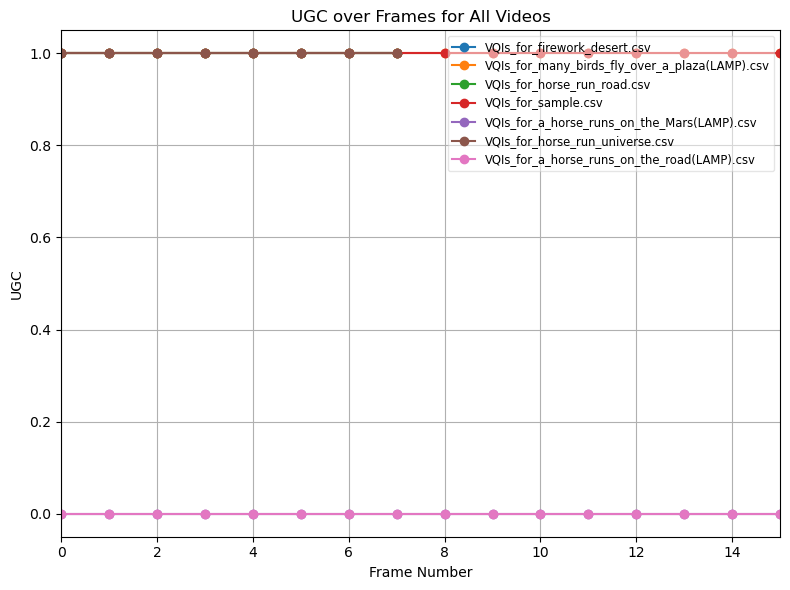

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory_path = 'test/'

csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

all_noise_data = {}

for file in csv_files:
    try:
        data = pd.read_csv(directory_path + file)

        if 'UGC' in data.columns:
            all_noise_data[file] = data['UGC']
    except pd.errors.EmptyDataError:
        print(f"The file {file} is empty.")
    except KeyError:
        print(f"The file {file} does not contain a 'ugc' column.")
    except Exception as e:
        print(f"An error occurred while reading {file}: {e}")

plt.figure(figsize=(8, 6))
for file, noise_data in all_noise_data.items():
    plt.plot(noise_data, marker='o', linestyle='-', label=file)

plt.title('UGC over Frames for All Videos')
plt.xlabel('Frame Number')
plt.ylabel('UGC')
plt.xlim(0, 15)   
plt.legend(fontsize='small', framealpha=0.5, loc='upper right')   
plt.grid(True)   
plt.tight_layout()  
plt.show()


In [ ]:
from moviepy.editor import VideoFileClip

def gif_to_mp4(gif_path, output_path):
    clip = VideoFileClip(gif_path)
    clip.write_videofile(output_path, codec="libx264")

gif_path = 'test/many_birds_fly_over_a_plaza.gif'  # gif path
output_path = 'test/many_birds_fly_over_a_plaza.mp4'        # output mp4
gif_to_mp4(gif_path, output_path)